In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import linear regression model
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

In [46]:
A= pd.read_csv('fair_pay_data.csv', index_col=0)

In [47]:
A.head()


,department,salary,new_hire,job_level
employee_id,,,,
1,Sales,103263.63550,No,Salaried
2,Engineering,80708.64104,No,Hourly
4,Engineering,60737.04786,Yes,Hourly
5,Engineering,99116.32328,Yes,Salaried
7,Engineering,51021.64386,No,Hourly


In [48]:
A= pd.get_dummies(A, columns=['job_level'])
A= pd.get_dummies(A, columns=['department'])
A= pd.get_dummies(A, columns=['new_hire'])


In [100]:
mycols=['job_level_Hourly','job_level_Manager', 'job_level_Salaried', 'department_Engineering', 'department_Finance','department_Sales', 'new_hire_No','new_hire_Yes']

In [53]:
x= A.drop(columns= ['salary'])
y= A['salary']

In [54]:
A.head()

,salary,job_level_Hourly,job_level_Manager,job_level_Salaried,department_Engineering,department_Finance,department_Sales,new_hire_No,new_hire_Yes
employee_id,,,,,,,,,
1,103263.63550,0,0,1,0,0,1,1,0
2,80708.64104,1,0,0,1,0,0,1,0
4,60737.04786,1,0,0,1,0,0,0,1
5,99116.32328,0,0,1,1,0,0,0,1
7,51021.64386,1,0,0,1,0,0,1,0


In [55]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.3, random_state=1)

In [56]:
c2_tree= tree.DecisionTreeRegressor(random_state=1, max_depth=1)
c2_tree= c2_tree.fit(xtrain,ytrain)
pred1= c2_tree.predict(xtest)


In [60]:
rmse= np.sqrt(np.sum((pred1-ytest)**2/len(ytest)))
rmse

10946.418636397122

In [64]:
mape=(abs((ytest-pred1)/ytest))/len(ytest)

In [66]:
sum(mape)

0.12141970558177384

In [85]:
rmse_test=[]
mape_test=[]
depth=[]
for i in range(1,6):
    c2_tree= tree.DecisionTreeRegressor(random_state=1, max_depth=i)
    c2_tree= c2_tree.fit(xtrain,ytrain)
    pred1= c2_tree.predict(xtest)
    rmse= np.sqrt(np.sum((pred1-ytest)**2/len(ytest)))
    rmse_test.append(rmse)
    mape=np.mean(np.absolute((ytest-pred1)/ytest))
    mape_test.append(mape)
    depth.append(i)
rmse_test


[10946.418636397122,
 8804.334630836478,
 8815.132984303744,
 8822.744473245319,
 8837.062581662336]

In [86]:
mape_test

[0.12141970558177385,
 0.10724034373126289,
 0.10737466969884527,
 0.10735648303831362,
 0.1075517840401925]

In [113]:
df1=pd.DataFrame([depth,rmse_test,mape_test]).T
df1.columns= ['depth','rmse_test','mape_test']
df1

,depth,rmse_test,mape_test
0,1.0,10946.418636,0.121420
1,2.0,8804.334631,0.107240
2,3.0,8815.132984,0.107375
3,4.0,8822.744473,0.107356
4,5.0,8837.062582,0.107552


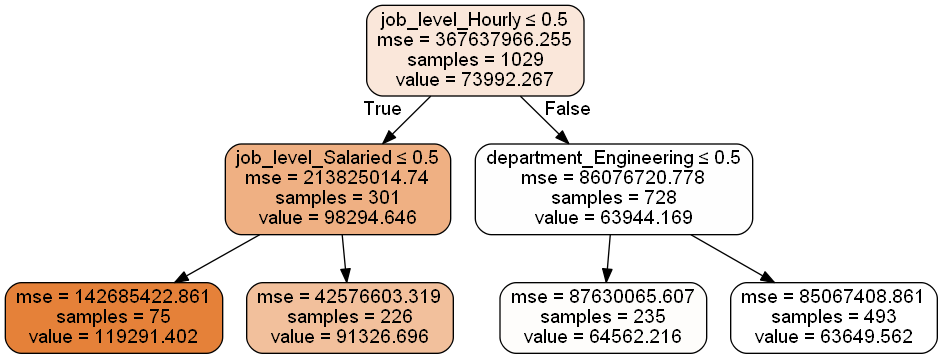

In [101]:
c2_tree= tree.DecisionTreeRegressor(random_state=1, max_depth=2)
c2_tree= c2_tree.fit(xtrain,ytrain)


#to view the tree
dot_data=StringIO()
export_graphviz(c2_tree,out_file=dot_data, feature_names=mycols, filled= True, rounded =True, special_characters= True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#graph.write_png('Toy_tree_depth1.png')

In [116]:
finaldepth= df1['depth'][df1['rmse_test']==max(rmse_test)] + 1

In [117]:
finaldepth

0    2.0
Name: depth, dtype: float64